In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

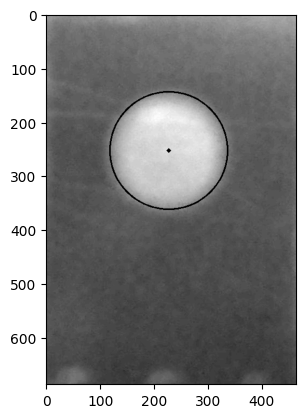

In [196]:
import os
import matplotlib.animation as animation

list_imgs = os.listdir("data/")

# img_threshs = np.zeros((687, 465,len(list_imgs)))
img_threshs = []

# fig, ax = plt.subplots()

i = 0
# for img in list_imgs:
img_ = list_imgs[i]   
image = cv2.imread(os.path.join("data/",img_), cv2.IMREAD_COLOR)
# img = image.copy()
# img = cv2.medianBlur(image,5)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.max()/2), img_gray.max(), 0)
# plt.imshow(img)
circles = cv2.HoughCircles(thresh,cv2.HOUGH_GRADIENT,2,20,
                        param1=50,param2=30,minRadius=95,maxRadius=110)
if circles is None:
    print("Failed")
else:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img_gray,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(img_gray,(i[0],i[1]),2,(0,0,255),3)
    # 
    # 
    plt.imshow(img_gray,cmap="gray")
    # ret, thresh = cv2.threshold(img_gray, int(img_gray.max()/2), img_gray.max(), 0)
    # im = ax.imshow(thresh,cmap="gray", animated=True)
    # if i == 0:
    #     ax.imshow(thresh,cmap="gray")
    # img_threshs.append([im])
    # i= i+1
    

In [181]:
circles

array([[[225, 255, 110],
        [297, 151, 111]]], dtype=uint16)

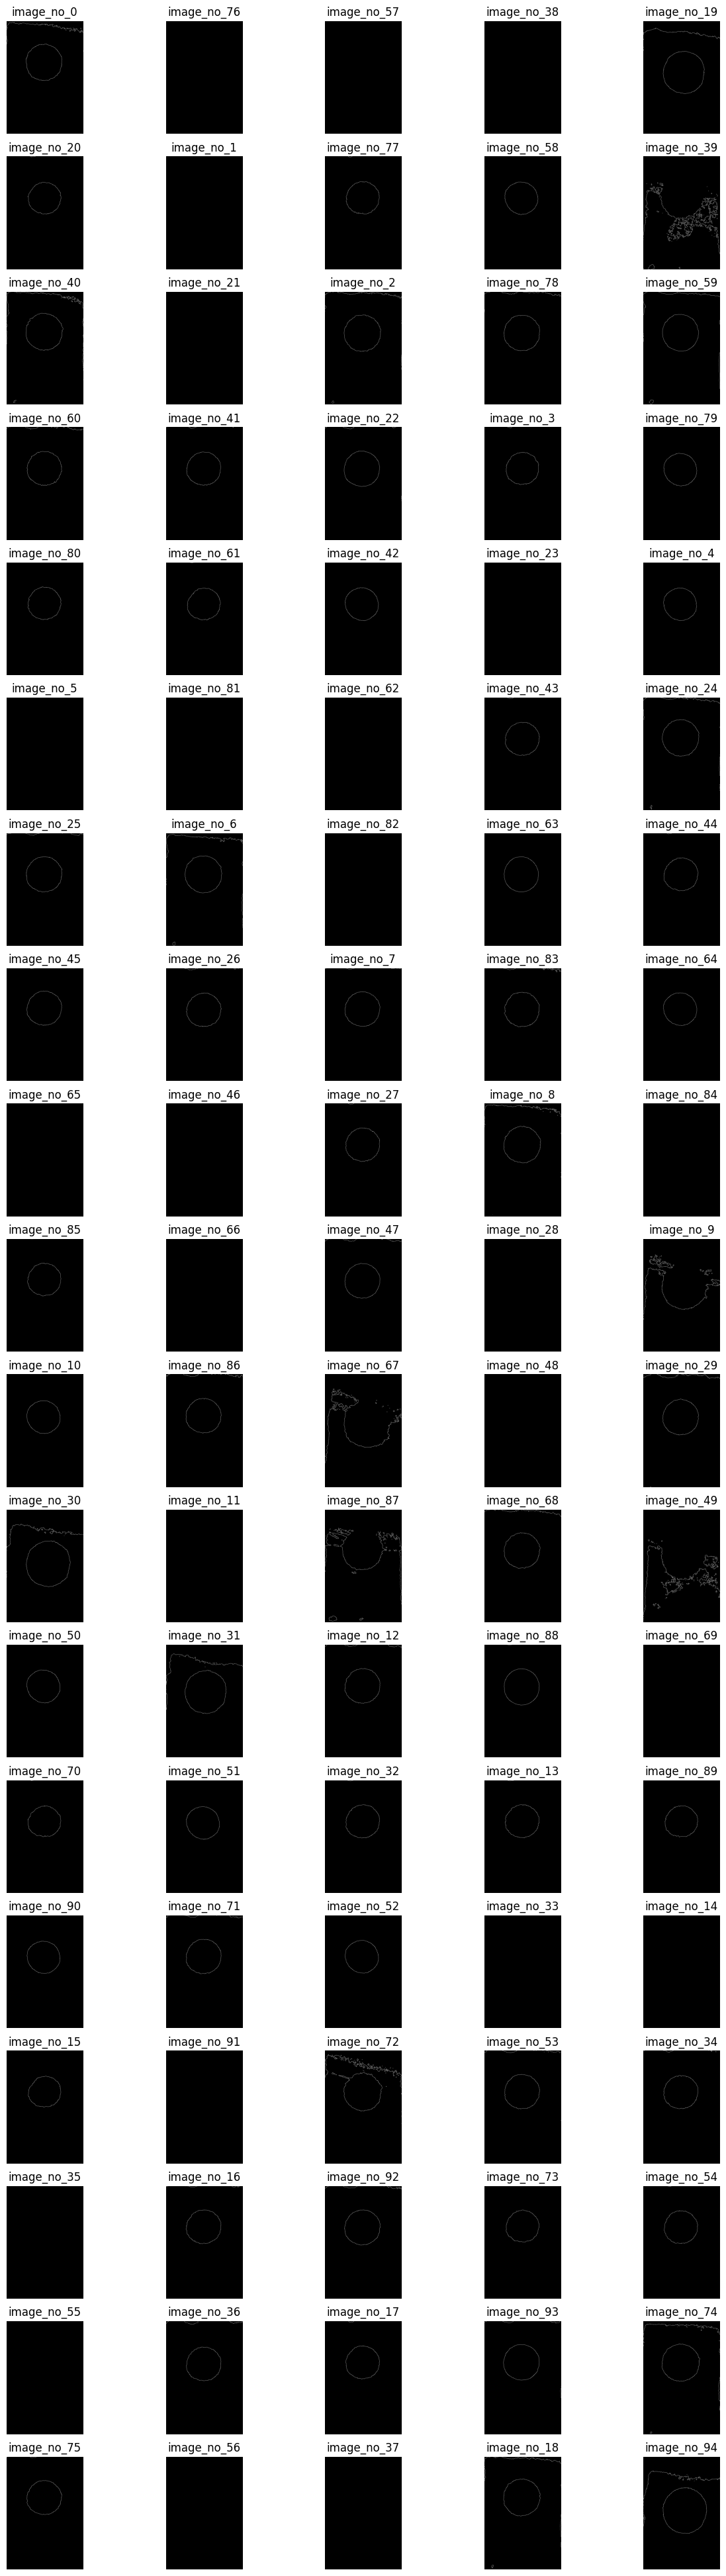

In [2]:
# Load your image

def thresh_bw_image(img_path:str):
    """ 
    parameter:
    image(String) = path to image file (png, jpeg)

    return:
    bw_image(cv2.image_array/numpy_image_array)
    """
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = image.copy()
    # img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5, 5), 0)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bw_image = cv2.threshold(img_gray, int(img_gray.max()/2), img_gray.max(), 0)
    return bw_image,img_gray

# Load image 
n = 0

list_imgs = os.listdir("data/")
dict_cent = {}
# img_path = os.path.join("data/",list_imgs[n])

img_row = int(len(list_imgs)/5)
img_cols = 5

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join("data/",list_imgs[n+i]))
    edges = cv2.Canny(bw_img,100,200)
    # circles = cv2.HoughCircles(bw_img,cv2.HOUGH_GRADIENT,2,20,
    #                     param1=50,param2=30,minRadius=90,maxRadius=120)
    # if circles is None:
    #     # print("Failed")
    #     axarr[i%img_row,i%img_cols].imshow(img_gray,cmap="gray")
    #     dict_cent[list_imgs[n+i]] = ("NA",0)
    # else:
    # dict_cent[list_imgs[n+i]] = (circles[0],circles[0].shape[0])
    # circles = np.uint16(np.around(circles))
    # for j in circles[0,:]:
        # # draw the outer circle
        # cv2.circle(img_gray,(j[0],j[1]),j[2],(0,255,0),2)
        # # draw the center of the circle
        # cv2.circle(img_gray,(j[0],j[1]),2,(0,0,255),3)
    axarr[i%img_row,i%img_cols].imshow(edges,cmap="gray")
            

    axarr[i%img_row,i%img_cols].axis("off")
    axarr[i%img_row,i%img_cols].set_title("image_no_{}".format(i))

plt.show()

In [203]:
img_file = list(dict_cent.keys())

In [221]:
import csv

output_path = "centers.csv"
with open(output_path, 'w', newline='') as f:
    # Create a CSV writer object
    writer = csv.writer(f)
    for row in dict_cent.items():
        writer.writerow(row)

In [213]:
dict_cent[img_file[0]]

array([227. , 253. , 108.6], dtype=float32)